# Coursera-Week14

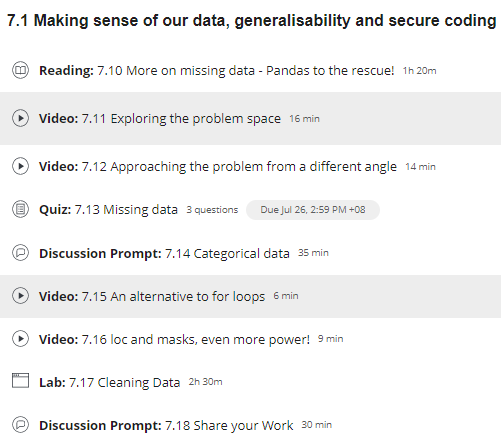

## 7.10 More on missing data - Pandas to the rescue!

The reading for this topic is as follows:

pandas 'Working with missing data' (2020). https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

If any of the links are broken, let us know via the Student Portal. 



## 7.11 Exploring the problem space



# Change DATA

In [1]:
import pandas as pd
data_url = "pima_indians_diabetes_data-raw.csv"
data_url = 'https://dr3vr6j2erh62.cloudfront.net/mediastore\
/dsm020/datasets/pima_indians-diabetes_data-raw.csv'
df = pd.read_csv(data_url)


In [2]:
df.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [3]:
df.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#### BMI cannot have 0

In [4]:
df['diabetes'].dtype


dtype('bool')

In [5]:
df['diabetes']==True

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: diabetes, Length: 768, dtype: bool

In [6]:
df.dtypes

times_pregnant                    int64
plasma_glucose_concentration      int64
diastolic_blood_pressure          int64
triceps_thickness                 int64
2-hour_serum_insulin              int64
BMI                             float64
diabetes_pedigreen              float64
age                               int64
diabetes                           bool
dtype: object

There are lots of cases where we convert types to integers. One of the main reasons is that we can perform complex mathematical functions with integers - for example when working with machine learning toolkits that expect numerical values.

In [7]:
df['diabetes'] = df['diabetes'].astype(int)

Some are impossible to have zero values.  It's missing data have been filled out with zero.

In [8]:
df.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
import numpy as np

In [10]:
df2 = df.copy()

In [11]:
for col in df2.columns[1:7]:
    df2[col]=df2[col].replace(0,np.nan)
df2.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
df2.isna().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
2-hour_serum_insulin            374
BMI                              11
diabetes_pedigreen                0
age                               0
diabetes                          0
dtype: int64

In [13]:
# Inplace and changing all entire datafrae.
df3 = df.copy()
df3.replace(0, np.nan, inplace=True)

#### Beware of changing the whole dataframe
it is possible to have zero value for pregnancy, but not height and weight.

time_pregnant became 0.  0 for time_pregnant is actually reasonable... diabetes also changed.

In [14]:
df3.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


# Now, it's your turn (Exercise 1)

In [15]:
import pandas as pd


In [16]:
hdb_dirty=pd.read_csv('hdb_dirty.csv')

In [17]:
hdb_dirty

,month,town,flat_type,floor_area_sqm,lease_commence_date,resale_price
0,2016-11,ANG MO KIO,4 ROOM,92.0,1977,590000.0
1,2016-10,ANG MO KIO,4 ROOM,92.0,1978,490000.0
2,2015-01,ANG MO KIO,3 ROOM,68.0,1979,290000.0
3,2014-09,ANG MO KIO,4 ROOM,92.0,1981,425000.0
4,2015-12,ANG MO KIO,EXECUTIVE,153.0,1996,760000.0
...,...,...,...,...,...,...
1995,2012-06,YISHUN,3 ROOM,64.0,1986,288000.0
1996,2017-05,YISHUN,3 ROOM,74.0,1987,300000.0
1997,2017-04,YISHUN,EXECUTIVE,146.0,1987,645000.0
1998,2016-09,YISHUN,4 ROOM,84.0,1987,338000.0


### Check if any of the columns contains NaN

In [21]:
hdb_dirty.isna().any()

month                  False
town                    True
flat_type              False
floor_area_sqm          True
lease_commence_date    False
resale_price            True
dtype: bool

### Calculate the numbers of NaN in all columns

In [22]:
hdb_dirty.isna().sum()

month                   0
town                   35
flat_type               0
floor_area_sqm         35
lease_commence_date     0
resale_price           33
dtype: int64

### Do a Descriptive Statistics on the dataframe

In [23]:
hdb_dirty.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,1965.000000,2000.000000,1967.000000
mean,97.447074,1990.445500,455011.840305
std,24.369593,10.581352,130089.817500
min,34.000000,1967.000000,210000.000000
25%,76.000000,1983.000000,360000.000000
50%,98.000000,1988.000000,433000.000000
75%,111.000000,1999.250000,518000.000000
max,179.000000,2013.000000,991000.000000


### Check only the mean of resale_price

In [24]:
hdb_dirty['resale_price'].mean()

455011.840305033

### Assign the mean of resale price to mean_dirty

In [25]:
mean_dirty=hdb_dirty.resale_price.mean()

### Check which rows in resale price Series are empty

In [27]:
hdb_dirty[hdb_dirty.resale_price.isna()]

,month,town,flat_type,floor_area_sqm,lease_commence_date,resale_price
1860,2016-05,WOODLANDS,4 ROOM,90.0,2004,NaN
1861,2013-03,WOODLANDS,4 ROOM,101.0,1999,NaN
1862,2014-07,WOODLANDS,5 ROOM,122.0,1998,NaN
1863,2012-06,WOODLANDS,4 ROOM,101.0,2000,NaN
1864,2012-07,WOODLANDS,4 ROOM,91.0,1977,NaN
1865,2013-05,WOODLANDS,4 ROOM,100.0,2000,NaN
1866,2013-10,WOODLANDS,5 ROOM,123.0,1998,NaN
1867,2016-08,WOODLANDS,4 ROOM,91.0,1980,NaN
1868,2016-12,WOODLANDS,3 ROOM,68.0,1981,NaN
1963,2017-01,YISHUN,4 ROOM,84.0,1985,NaN


### Replace the empty resale_price with mean

In [29]:
hdb_dirty.replace(np.nan, mean_dirty, inplace=True)

### Check which rows in resale price Series are empty

In [30]:
hdb_dirty[hdb_dirty.resale_price.isna()]

,month,town,flat_type,floor_area_sqm,lease_commence_date,resale_price


## 7.12 Approaching the problem from a different angle: 1st Method

In [ ]:
df2.describe()

In [ ]:
np.mean(df2.plasma_glucose_concentration)

In [ ]:
np.std(df2.plasma_glucose_concentration)

#### The maximum (199) is way far from average (outlier)

In [ ]:
m = np.mean(df2.plasma_glucose_concentration)
sd =np.std(df2.plasma_glucose_concentration)

In [ ]:
df3 = df2.copy()

In [ ]:
for (i, val) in enumerate(df3["plasma_glucose_concentration"]):
    if val > (m + 2.5*sd) or val < (m - 2.5*sd):
        df3.at[i, "plasma_glucose_concentration"]=m
        print("replaced an outlier", i, val)


# Now, it's your turn (Exercise: 2)

### Check the mean of resale_price

In [31]:
np.mean(hdb_dirty.resale_price)

455011.84030503395

### Check the standard deviation of resale_price

In [33]:
np.std(hdb_dirty.resale_price)

128979.31418128138

### Check the max of resale_price

In [34]:
np.max(hdb_dirty.resale_price)

991000.0

### Replacing higher value with the mean()

In [38]:
m_resale=np.mean(hdb_dirty.resale_price)

In [39]:
sd_resale=np.std(hdb_dirty.resale_price)

### Replacing the `outlier`with 3 std above and below the mean

In [40]:
for (i, val) in enumerate(hdb_dirty.resale_price):
    if val > (m_resale + 3 *sd_resale) or val < (m_resale - 3*sd_resale):
        hdb_dirty.at[i, "resale_price"]=m_resale
        print("replaced an outlier", i, val)


replaced an outlier 18 980000.0
replaced an outlier 210 910000.0
replaced an outlier 348 875000.0
replaced an outlier 358 865000.0
replaced an outlier 480 991000.0
replaced an outlier 481 850000.0
replaced an outlier 484 885000.0
replaced an outlier 487 900000.0
replaced an outlier 577 888888.0
replaced an outlier 591 900000.0
replaced an outlier 596 880000.0
replaced an outlier 1006 890000.0
replaced an outlier 1013 948000.0
replaced an outlier 1019 920000.0
replaced an outlier 1072 843888.0
replaced an outlier 1081 910000.0
replaced an outlier 1241 845000.0
replaced an outlier 1250 888888.88
replaced an outlier 1252 845000.0
replaced an outlier 1254 900000.0
replaced an outlier 1276 930000.0
replaced an outlier 1282 915000.0
replaced an outlier 1491 842300.0
replaced an outlier 1701 910000.0


## Wait... .is that right?  If the method (replacing higher value) is right, why?  If No, why not?  

##  7.13 Missing data

1. When we describe data as 'missing', which of these data types are we considering?
* `Data values that are not present`
* `Data values that are not applicable` (e.g., 0 is not applicable in height)
* `None or Null type data`

2. If we were to insert missing values through assignment to a numeric container, which datatype would this correspond to?
* `NaN`
* skipna=False [This is a useful way to override certain behaviours on input but is not correct]
* None [We might be inserting a None value, but the numeric container will represent this as a different data type.]

3. What is the sum (total) of an NA series or column of a DataFrame?
* 0 [This is correct and is consistent with how NumPy works.]
* 1 [This would be the product, not the sum.]
* NaN [This would be true in older versions but no longer holds true.]


### Let's see question 3.
What is the sum (total) of an NA series or column of a DataFrame?

#### Replacing df3

In [41]:
df3=df.copy()

#### Replacing all values in plasma_glucose_concentration as NaN

In [42]:
df3.plasma_glucose_concentration = df3.plasma_glucose_concentration.replace\
(df3.plasma_glucose_concentration.values, np.nan)

#### Checking the values

In [43]:
df3.plasma_glucose_concentration

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
763   NaN
764   NaN
765   NaN
766   NaN
767   NaN
Name: plasma_glucose_concentration, Length: 768, dtype: float64

#### check how many are NaN (all)

In [44]:
df3.plasma_glucose_concentration.isna().sum()

768

### SUM all NaN will equal to 0

In [45]:
df3.plasma_glucose_concentration.sum()

0.0

#### The result ABOVE is not NaN, but 0.0 (float), not integer

#### Change the first value to 1 (only one value is changed)

In [46]:
df3.plasma_glucose_concentration.at[0]=1

In [47]:
df3.plasma_glucose_concentration

0      1.0
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
763    NaN
764    NaN
765    NaN
766    NaN
767    NaN
Name: plasma_glucose_concentration, Length: 768, dtype: float64

In [48]:
df3.plasma_glucose_concentration.isna().sum()

767

In [49]:
df3.plasma_glucose_concentration.sum()

1.0

#### The result ABOVE is not NaN, is not 0.0 (float), but the valid number 1.0 (float)

In [50]:
df3.plasma_glucose_concentration.at[1]=30

In [51]:
df3.plasma_glucose_concentration.head(3)

0     1.0
1    30.0
2     NaN
Name: plasma_glucose_concentration, dtype: float64

In [52]:
df3.plasma_glucose_concentration.sum()

31.0

### Compare with Numpy (just beware)

In [53]:
import numpy as np

np.array([np.nan, np.nan,np.nan])

array([nan, nan, nan])

#### In Numpy, all nan is NAN, not 0.0 (float) as dataframe or series

In [54]:
np.array([np.nan, np.nan,np.nan]).sum()

nan

#### In Numpy, Even we have a number, the resust is still  NAN

In [55]:
np.array([1, np.nan,np.nan]).sum()

nan

In [56]:
np.array([1, np.nan,3]).sum()

nan

#### How to get similar result as series

In [57]:
np.nansum(np.array([1, np.nan,3]))

4.0

## 7.14 Categorical data

We have been working primarily with numeric scale and count data here, where statistics like means and medians make sense. 

What could we do with `missing values` for categorical data such as `gender`?

Post your thoughts and comment in the discussion forum. Please also comment on at least two of your peers' posts.

Participation is optional

### Possible Answer:


* Ignore observation
* Replace by most frequent value
* Replace using a machine learning algorithm
* Predict the observation using a multiclass predictor like Logistic Regression.

##  7.15 An alternative to for loops:  2nd Method



In [60]:
df4 = df2.copy()
m = np.mean(df2.plasma_glucose_concentration)
sd =np.std(df2.plasma_glucose_concentration)

In [61]:
np.mean(df2.plasma_glucose_concentration)

121.6867627785059

In [62]:
np.std(df2.plasma_glucose_concentration)

30.515624262345657

In [63]:
np.max(df2.plasma_glucose_concentration)

199.0

#### Check the mean Above 2.5 standard deviation

In [64]:
df4.loc[df4["plasma_glucose_concentration"]> (m+sd*2.5), "plasma_glucose_concentration"]

561    198.0
661    199.0
Name: plasma_glucose_concentration, dtype: float64

In [65]:
df4.loc[df4["plasma_glucose_concentration"]> (m+sd*2.5), "plasma_glucose_concentration"] = m

#### Check the mean BELOW 2.5 standard deviation

In [66]:
df4.loc[df4["plasma_glucose_concentration"] < (m-sd*2.5), "plasma_glucose_concentration"]

62    44.0
Name: plasma_glucose_concentration, dtype: float64

In [67]:
df4.loc[df4["plasma_glucose_concentration"] < (m-sd*2.5), "plasma_glucose_concentration"] = m

In [68]:
df4.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.587235,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.149764,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,197.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 7.16 loc and masks, even more power! 3rd Method


##### 1, 2, 3 = false, true, false = false, 2,  false

In [69]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [70]:
test1=pd.Series([1,2,3])

In [71]:
test1==2

0    False
1     True
2    False
dtype: bool

In [72]:
test1==3

0    False
1    False
2     True
dtype: bool

In [73]:
test1[test1==3]

2    3
dtype: int64

In [74]:
test1==2

0    False
1     True
2    False
dtype: bool

In [75]:
test1==3

0    False
1    False
2     True
dtype: bool

In [76]:
(test1==2)| (test1==3)

0    False
1     True
2     True
dtype: bool

In [77]:
test1[(test1==2)| (test1==3)]

1    2
2    3
dtype: int64

In [78]:
testmask=(test1==2)| (test1==3)

In [79]:
test1[testmask]

1    2
2    3
dtype: int64

In [80]:
a=(test1==2)| (test1==3)

In [81]:
b=(test1==2)| (test1==1)

In [82]:
a & b

0    False
1     True
2    False
dtype: bool

In [83]:
test1[a&b]

1    2
dtype: int64

In [84]:
df5= df2.copy()
m = np.mean(df2.plasma_glucose_concentration)
sd =np.std(df2.plasma_glucose_concentration)



In [85]:
threshold  = sd*2.5


In [86]:
(df5['plasma_glucose_concentration'] > (m*threshold)) 

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: plasma_glucose_concentration, Length: 768, dtype: bool

In [87]:
(df5['plasma_glucose_concentration'] > (m+threshold)) |\
(df5['plasma_glucose_concentration'] < (m-threshold))

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: plasma_glucose_concentration, Length: 768, dtype: bool

In [88]:
mask = (df5['plasma_glucose_concentration'] > (m+threshold)) |\
(df5['plasma_glucose_concentration'] < (m-threshold))

### mask above is getting only those above OR below the mean

In [89]:
df5[mask]

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
62,5,44.0,62.0,NaN,NaN,25.0,0.587,36,0
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28,1
661,1,199.0,76.0,43.0,NaN,42.9,1.394,22,1


### To replace a value, must use df.loc

In [90]:
df5.loc[mask]

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
62,5,44.0,62.0,NaN,NaN,25.0,0.587,36,0
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28,1
661,1,199.0,76.0,43.0,NaN,42.9,1.394,22,1


In [91]:
df5.loc[mask, "plasma_glucose_concentration"] = m

In [92]:
df5.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.587235,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.149764,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,197.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 7.17 Cleaning Data

##  7.18 Share your Work

Go back to the previous course activity: `7.17 Cleaning Data`

Share your approach on the discussion forum and comment on a post from one of your peers.

You can also share your lab work on the discussion forum:

Use the "Generate/Update shared link" button to generate a read-only version of your lab.

Copy and paste the generated link to another browser tab and make sure it works.

Post your generated link in the discussion forum so that other students can review your work and comment on at least one other post.

If any of the links are broken, let us know via the Student Portal.



# Possible Answer: Exercise 1

In [ ]:
import pandas as pd


In [ ]:
hdb_dirty=pd.read_csv('hdb_dirty.csv')

In [ ]:
hdb_dirty

### Check if any of the columns contains NaN

In [ ]:
hdb_dirty.isna().any()

### Calculate the numbers of NaN in all columns

In [ ]:
hdb_dirty.isna().sum()

### Do a Descriptive Statistics on the dataframe

In [ ]:
hdb_dirty.describe()

### Check only the mean of resale_price

In [ ]:
hdb_dirty['resale_price'].mean()

### Assign the mean of resale price to mean_dirty

In [ ]:
mean_dirty=hdb_dirty.resale_price.mean()

### Check which rows in resale price Series are empty

In [ ]:
hdb_dirty[hdb_dirty.resale_price.isna()]

### Replace the empty resale_price with mean

In [ ]:
hdb_dirty.replace(np.nan, mean_dirty, inplace=True)

### Check which rows in resale price Series are empty

In [ ]:
hdb_dirty[hdb_dirty.resale_price.isna()]

In [ ]:
hdb_dirty['resale_price'].mean()

# Now, it's your turn (Exercise: 2)

### Check the mean of resale_price

In [ ]:
np.mean(hdb_dirty.resale_price)

### Check the standard deviation of resale_price

In [ ]:
np.std(hdb_dirty.resale_price)

### Check the max of resale_price

In [ ]:
np.max(hdb_dirty.resale_price)

### Replacing the `outlier`with 3 std above and below the mean

In [ ]:
for (i, val) in enumerate(hdb_dirty.resale_price):
    if val > (m_resale + 3*sd_resale) or val < (m_resale - 3*sd_resale):
        hdb_dirty.at[i, "resale_price"]=m_resale
        print("replaced an outlier", i, val)


## 